### visualise one model output

In [1]:
import numpy as np
import nilearn.plotting

#### one model posterior mean (l) and prediction error (KL divergence) with h and l pain 

In [2]:
#     con_names = ['Stim_ppxpmod_mean^1','Stim_pexpmod_pe^1', 'High','Low']
#     # pmod contrasts
#     cont01 = ['pmod_mean', 'T', con_names, [1,0,0,0,0]]
#     cont02 = ['pmod_mean_neg', 'T', con_names, [-1,0,0,0,0]]
#     cont03 = ['pmod_pe', 'T', con_names, [0,1,0,0,0]]
#     cont04 = ['pmod_pe_neg', 'T', con_names, [0,-1,0,0,0]]
#     cont05 = ['pmod_sd', 'T', con_names, [0,0,1,0,0]]
#     cont06 = ['pmod_sd_neg', 'T', con_names, [0,0,-1,0,0]]
#     cont07 = ['High>Low','T', con_names, [0,0,0,1,-1]]
#     cont08 = ['Low>High','T', con_names, [0,0,0,-1,1]]

##### contrast01 posterior mean of low pain

In [133]:
bg = '../../../TSL_anat/mean_anat.nii.gz'

In [134]:
# pmod posterior mean
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0001/spmT_0001_thr.nii'
z_map = img

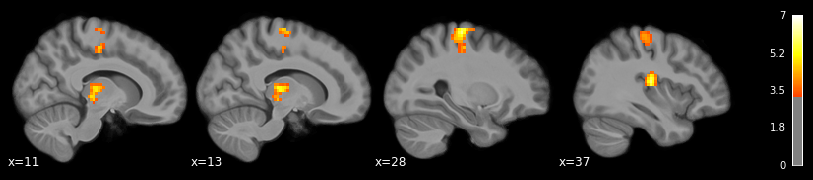

In [138]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/io_jump_freq_pl_x.pdf')

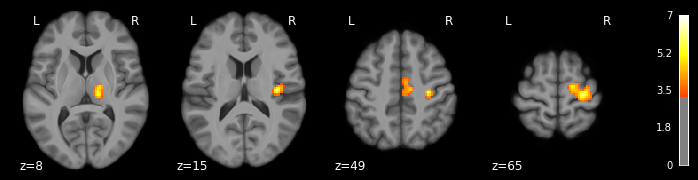

In [139]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_freq_pl_z.pdf')

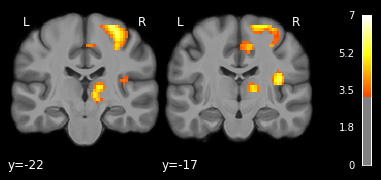

In [140]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_freq_pl_y.pdf')

In [136]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [137]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  28 & -22 &  65 &      6.158 &               5265 \\
1 &         1a &  30 & -19 &  49 &      6.012 &                    \\
2 &         1b &  16 & -12 &  65 &      5.148 &                    \\
3 &         1c &  23 & -10 &  68 &      4.575 &                    \\
4 &          2 &  37 & -17 &  15 &      6.013 &               1311 \\
5 &          3 &  13 & -22 &   8 &      5.407 &               1886 \\
6 &          4 &  11 & -17 &  49 &      4.683 &               2372 \\
7 &         4a &   0 &  -2 &  43 &      4.439 &                    \\
\bottomrule
\end{tabular}



##### contrast02 posterior mean of low pain negative (high pain)

In [163]:
# pmod posterior mean negative (high pain)
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0002/spmT_0001_thr.nii'
z_map = img

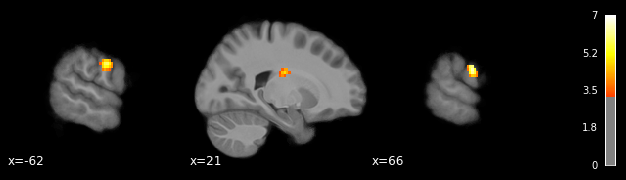

In [167]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/io_jump_freq_ph_x.pdf')

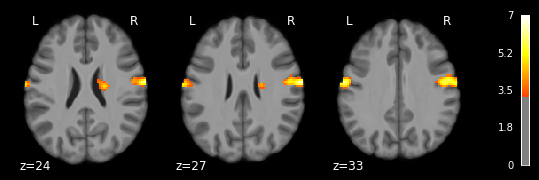

In [168]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_freq_ph_z.pdf')

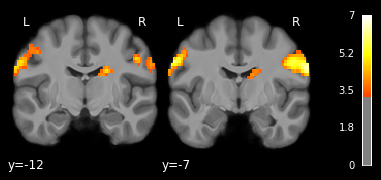

In [169]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_freq_ph_y.pdf')

In [165]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [166]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  66 &  -7 &  27 &      6.477 &               4402 \\
1 &         1a &  52 &  -7 &  33 &      5.787 &                    \\
2 &          2 & -62 &  -7 &  33 &      5.924 &               2408 \\
3 &         2a & -46 & -12 &  43 &      4.002 &                    \\
4 &          3 &  21 & -12 &  24 &      4.885 &               1491 \\
5 &         3a &  11 &  -2 &  15 &      4.197 &                    \\
6 &         3b &  13 &  -7 &  21 &      4.140 &                    \\
\bottomrule
\end{tabular}



##### contrast03 kl divergenece pe

In [170]:
# pmod kl divergence pe
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0003/spmT_0001_thr.nii'
z_map = img

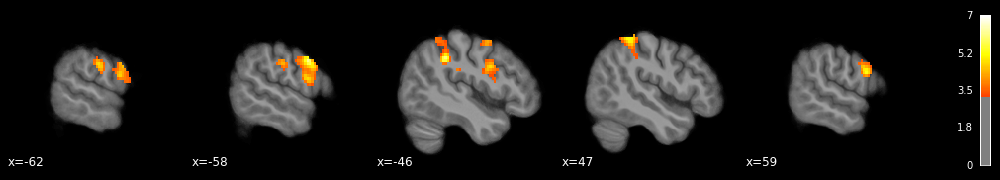

In [174]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/io_jump_kl_x.pdf')

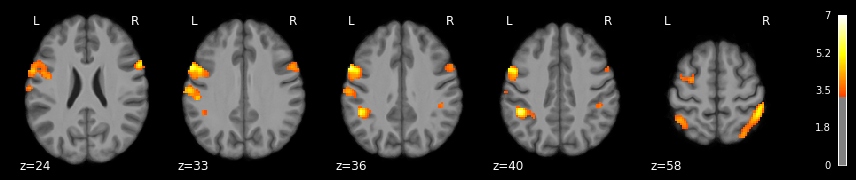

In [175]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_kl_z.pdf')

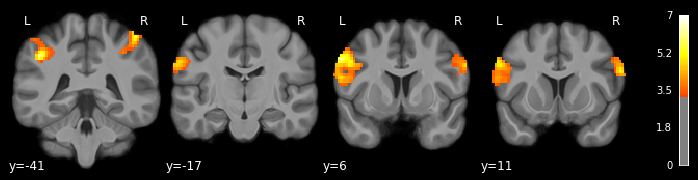

In [176]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_kl_y.pdf')

In [172]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [173]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0  &          1 & -58 &   6 &  36 &      6.191 &              11034 \\
1  &         1a & -26 &  -2 &  49 &      5.945 &                    \\
2  &         1b & -60 &   4 &  21 &      4.935 &                    \\
3  &         1c & -43 &   0 &  55 &      4.516 &                    \\
4  &          2 & -46 & -41 &  40 &      6.098 &               5193 \\
5  &         2a & -36 & -50 &  52 &      5.438 &                    \\
6  &         2b & -50 & -41 &  55 &      3.789 &                    \\
7  &          3 &  59 &  11 &  24 &      5.308 &               1886 \\
8  &          4 &  47 & -41 &  58 &      5.295 &               6128 \\
9  &         4a &  37 & -50 &  52 &      4.972 &                    \\
10 &         4b &  37 & -58 &  61 &      4.460 &                    \\
11 &         4c &  30 & -65 &  61 &      4.255 &                    \\
12 &          5 & -62 & -17 &  33 

##### contrast04 kl divergence negative contrast

In [177]:
# pmod kl divergence negative
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0004/spmT_0001_thr.nii'
z_map = img

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:1608: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


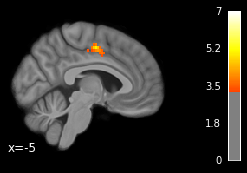

In [181]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/io_jump_nkl_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:1608: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


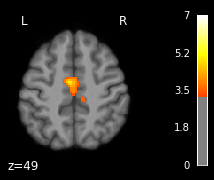

In [182]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_nkl_z.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/plotting/displays.py:1608: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


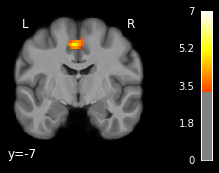

In [183]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg)
g.savefig('./figs_sd/io_jump_nkl_y.pdf')

In [179]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [180]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &  X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 & -5 &  -7 &  49 &      5.096 &               3414 \\
1 &         1a &  9 & -19 &  43 &      4.766 &                    \\
2 &         1b &  0 & -17 &  46 &      4.513 &                    \\
\bottomrule
\end{tabular}



##### contrast05 posterior sd positive contrast

In [200]:
# pmod posterior sd positivie
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0005/spmT_0001_thr.nii'
z_map = img

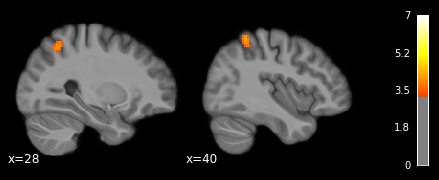

In [204]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/io_jump_psd_x.pdf')

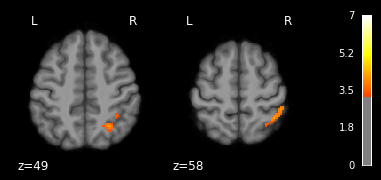

In [205]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/io_jump_psd_z.pdf')

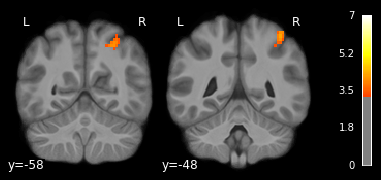

In [206]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg)
g.savefig('./figs_sd/io_jump_psd_y.pdf')

In [202]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [203]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  40 & -48 &  58 &      4.311 &               1186 \\
1 &         1a &  47 & -38 &  58 &      4.168 &                    \\
2 &         1b &  33 & -41 &  43 &      3.745 &                    \\
3 &          2 &  28 & -58 &  49 &      4.084 &                736 \\
\bottomrule
\end{tabular}



##### contrast06 posterior sd negative contrast (nothing survived)

In [191]:
# pmod posterior sd positivie
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0006/spmT_0001_thr.nii'
z_map = img

In [195]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=0)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/io_jump_nsd_x.pdf')

/home/fs0/syzhang/.local/lib/python3.8/site-packages/nilearn/masking.py:445: MaskWarning: Computed an empty mask. Are you sure that input images have a homogeneous background.
  mask, affine = _post_process_mask(mask, affine, opening=opening,


ValueError: The mask is invalid as it is empty: it masks all data.

In [197]:
# peak_x = np.unique(peaks['Z'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='z', cut_coords=(peak_x), bg_img=bg) 
# g.savefig('./figs_sd/io_jump_nsd_z.pdf')

In [198]:
# peak_x = np.unique(peaks['Y'])
# g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
#               display_mode='y', cut_coords=(peak_x), bg_img=bg)
# g.savefig('./figs_sd/io_jump_nsd_y.pdf')

In [193]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [199]:
# print(table.to_latex())

##### contrast07 high pain minus low pain trials

In [207]:
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0007/spmT_0001_thr.nii'
z_map = img

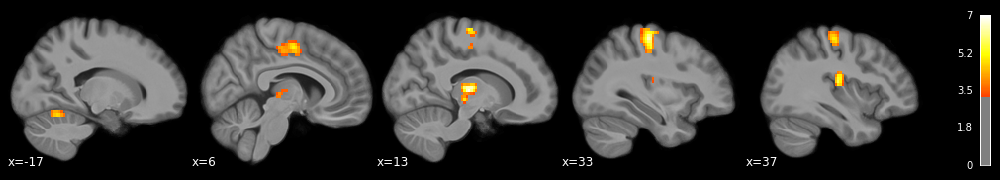

In [211]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/high_minus_low_x.pdf')

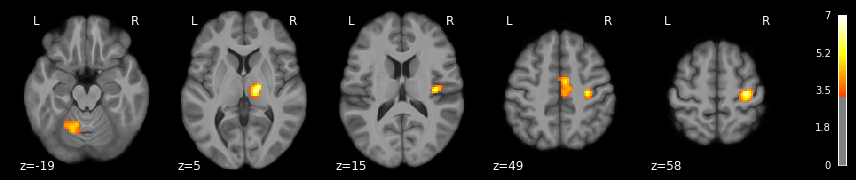

In [212]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/high_minus_low_z.pdf')

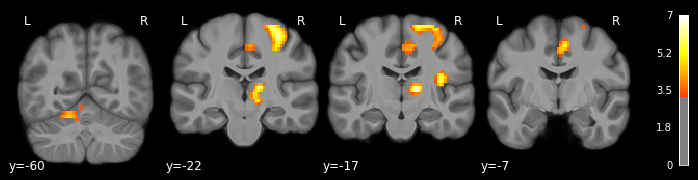

In [213]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/high_minus_low_y.pdf')

In [209]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [210]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0  &          1 &  13 & -17 &   5 &      6.886 &               2587 \\
1  &         1a &  13 & -22 &  -3 &      4.957 &                    \\
2  &          2 &  33 & -22 &  58 &      6.524 &               5247 \\
3  &         2a &  30 & -19 &  49 &      5.953 &                    \\
4  &         2b &  16 & -17 &  68 &      5.524 &                    \\
5  &          3 &  37 & -17 &  15 &      5.742 &               1186 \\
6  &          4 &   6 &  -7 &  49 &      5.128 &               3486 \\
7  &         4a &   0 &  -2 &  43 &      4.967 &                    \\
8  &         4b &   4 & -19 &  49 &      4.333 &                    \\
9  &         4c &  11 & -14 &  49 &      4.289 &                    \\
10 &          5 & -17 & -60 & -19 &      4.851 &               1707 \\
11 &         5a & -10 & -55 & -16 &      4.651 &                    \\
12 &         5b &  -7 & -62 & -22 

##### contrast08 low pain minus high pain trials

In [214]:
img = '../../../TSL_output/2ndLevel_io_jf_hl_pp_pe_sd_FDR0001/2ndLevel/con_0008/spmT_0001_thr.nii'
z_map = img

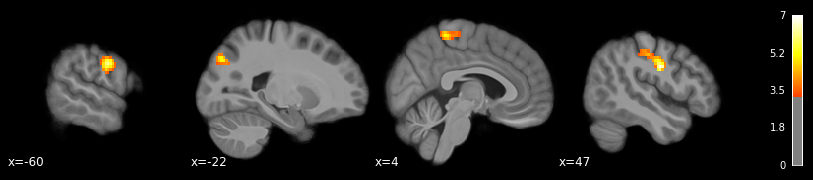

In [218]:
from nilearn.glm import threshold_stats_img
clean_map, threshold = threshold_stats_img(
    z_map, alpha=.001, height_control='fpr', cluster_threshold=10)
peak_x = np.unique(peaks['X'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='x', cut_coords=(peak_x), draw_cross=False, bg_img=bg)
g.savefig('./figs_sd/low_minus_high_x.pdf')

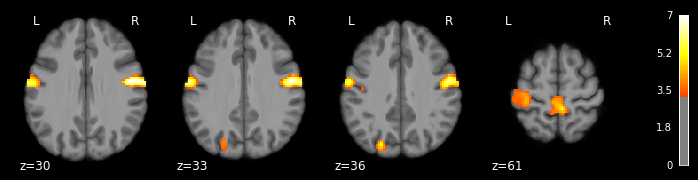

In [219]:
peak_x = np.unique(peaks['Z'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='z', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/low_minus_high_z.pdf')

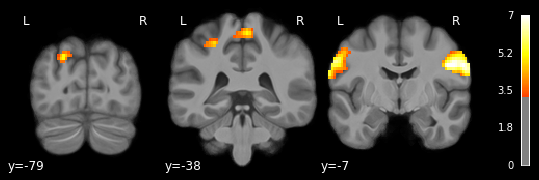

In [220]:
peak_x = np.unique(peaks['Y'])
g = nilearn.plotting.plot_stat_map(clean_map, threshold=threshold, vmax=7,
              display_mode='y', cut_coords=(peak_x), bg_img=bg) 
g.savefig('./figs_sd/low_minus_high_y.pdf')

In [216]:
from nilearn.reporting import get_clusters_table
table = get_clusters_table(clean_map, stat_threshold=threshold,
                           cluster_threshold=10)
table[['X','Y','Z']] = table[['X','Y','Z']].astype(int)
table[['Peak Stat']] = table[['Peak Stat']].round(3)
peaks = table[table['Cluster Size (mm3)'].astype(str).apply(lambda x: len(x))>0]

In [217]:
print(table.to_latex())

\begin{tabular}{llrrrrl}
\toprule
{} & Cluster ID &   X &   Y &   Z &  Peak Stat & Cluster Size (mm3) \\
\midrule
0 &          1 &  47 &  -7 &  30 &      7.211 &               6218 \\
1 &         1a &  61 &  -7 &  30 &      7.067 &                    \\
2 &         1b &  40 & -26 &  40 &      4.455 &                    \\
3 &         1c &  47 & -19 &  43 &      4.453 &                    \\
4 &          2 & -60 &  -7 &  33 &      6.263 &              12669 \\
5 &         2a & -67 & -10 &  24 &      5.806 &                    \\
6 &         2b & -53 & -10 &  43 &      5.170 &                    \\
7 &         2c & -26 & -41 &  49 &      5.074 &                    \\
8 &          3 &   4 & -38 &  61 &      5.249 &               2354 \\
9 &          4 & -22 & -79 &  36 &      5.231 &               1006 \\
\bottomrule
\end{tabular}



#### check design matrix

In [120]:
def plot_designmat(input_spm):
    """plot design matrix spm"""
    import matplotlib.pyplot as plt
    # Using scipy's loadmat function we can access SPM.mat
    spmmat = load_spmmat(input_spm)
    designMatrix = spmmat['SPM'][0][0].xX[0][0].X
    names = [i[0] for i in spmmat['SPM'][0][0].xX[0][0].name[0]]
    normed_design = designMatrix / np.abs(designMatrix).max(axis=0)
    fig, ax = plt.subplots(figsize=(28, 28))
    plt.imshow(normed_design, aspect='auto', cmap='gray', interpolation='none')
    ax.set_ylabel('Volume id')
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation=90);

def load_spmmat(input_spm):
    """load spm.mat"""
    from scipy.io import loadmat
    spmmat = loadmat(input_spm, struct_as_record=False)
    return spmmat

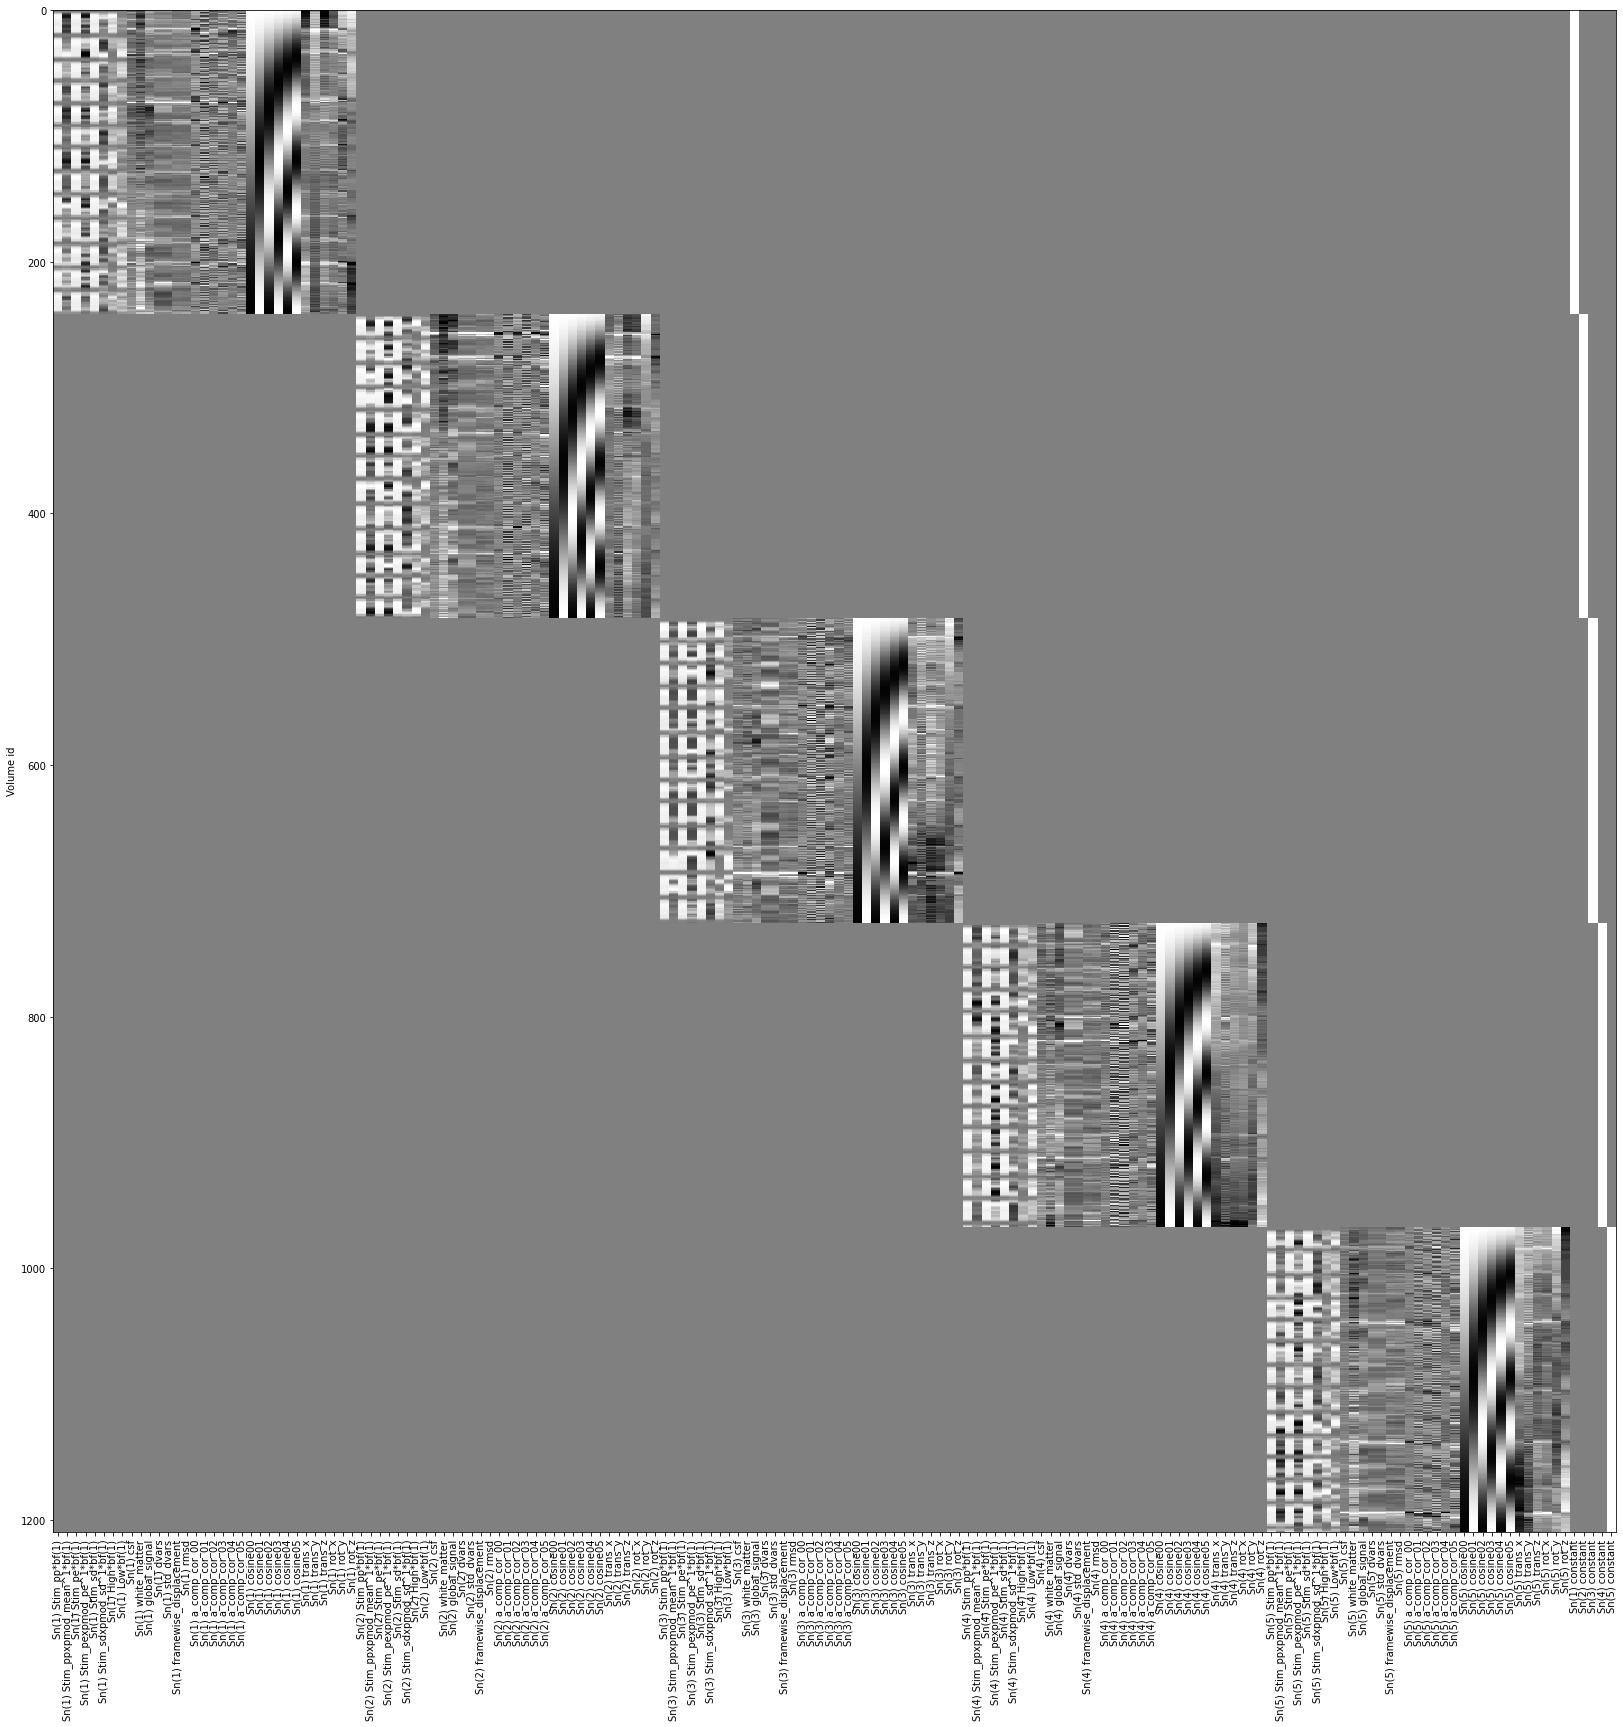

In [121]:
p = '../../../TSL_output/1stLevel_io_jf_hl_pp_pe_sd/1stLevel/sub-06'
plot_designmat(p+'/SPM.mat')

In [122]:
# contrast check
spmmat = load_spmmat(p+'/SPM.mat')
pmod_mean_name = spmmat['SPM'][0][0].xCon[0][0].name
pmod_mean_c = np.squeeze(spmmat['SPM'][0][0].xCon[0][0].c)

In [123]:
pmod_mean_name

array(['pmod_mean'], dtype='<U9')

In [124]:
# contrast
pmod_mean_c

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [126]:
len(pmod_mean_c) # cols: all stims + pmod_postmean + all stims + pmod_kl + all stims + pmod_sd + high stims + low stims = 8 + 25 confounds = 33 * 5 sessions = 165 + 5 constants = 170

170

In [127]:
np.argwhere(pmod_mean_c)

array([[  1],
       [ 34],
       [ 67],
       [100],
       [133]])

In [130]:
pmod_mean_name = spmmat['SPM'][0][0].xCon[0][6].name
pmod_mean_c = np.squeeze(spmmat['SPM'][0][0].xCon[0][6].c)

In [131]:
pmod_mean_c # high minus low

array([ 0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int16)

In [132]:
np.argwhere(pmod_mean_c)

array([[  6],
       [  7],
       [ 39],
       [ 40],
       [ 72],
       [ 73],
       [105],
       [106],
       [138],
       [139]])

##### note: high or low alone contrast can't be estimated due to colinearity

##### create background mean image

In [11]:
import os

In [27]:
anat_dir = '../../../TSL_anat/'
anat_imgs = []
for f in os.listdir(anat_dir):
    if '_bet' in f:
        anat_imgs.append(anat_dir+f)

In [28]:
anat_imgs

['../../../TSL_anat/sub-10_bet.nii.gz',
 '../../../TSL_anat/sub-06_bet.nii.gz',
 '../../../TSL_anat/sub-21_bet.nii.gz',
 '../../../TSL_anat/sub-37_bet.nii.gz',
 '../../../TSL_anat/sub-44_bet.nii.gz',
 '../../../TSL_anat/sub-43_bet.nii.gz',
 '../../../TSL_anat/sub-30_bet.nii.gz',
 '../../../TSL_anat/sub-26_bet.nii.gz',
 '../../../TSL_anat/sub-17_bet.nii.gz',
 '../../../TSL_anat/sub-28_bet.nii.gz',
 '../../../TSL_anat/sub-23_bet.nii.gz',
 '../../../TSL_anat/sub-19_bet.nii.gz',
 '../../../TSL_anat/sub-24_bet.nii.gz',
 '../../../TSL_anat/sub-41_bet.nii.gz',
 '../../../TSL_anat/sub-32_bet.nii.gz',
 '../../../TSL_anat/sub-08_bet.nii.gz',
 '../../../TSL_anat/sub-15_bet.nii.gz',
 '../../../TSL_anat/sub-39_bet.nii.gz',
 '../../../TSL_anat/sub-09_bet.nii.gz',
 '../../../TSL_anat/sub-25_bet.nii.gz',
 '../../../TSL_anat/sub-33_bet.nii.gz',
 '../../../TSL_anat/sub-38_bet.nii.gz',
 '../../../TSL_anat/sub-14_bet.nii.gz',
 '../../../TSL_anat/sub-29_bet.nii.gz',
 '../../../TSL_anat/sub-13_bet.nii.gz',


In [29]:
from nilearn import image
mean_img = image.mean_img(anat_imgs)

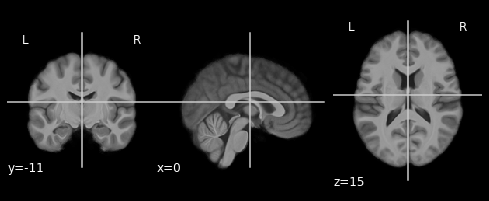

In [30]:
nilearn.plotting.plot_anat(mean_img)

In [31]:
mean_img.to_filename(anat_dir+'mean_anat.nii.gz')